## Functional CellPose Model utilizing the GPU version

In [17]:
import numpy as np
import pandas as pd
from cellpose import models, core, io, plot
from pathlib import Path
from tqdm import trange
import matplotlib.pyplot as plt
from natsort import natsorted 

In [18]:
io.logger_setup()

creating new log file
2025-10-29 14:50:38,451 [INFO] WRITING LOG OUTPUT TO C:\Users\labadmin\.cellpose\run.log
2025-10-29 14:50:38,452 [INFO] 
cellpose version: 	4.0.6 
platform:       	win32 
python version: 	3.12.10 
torch version:  	2.8.0+cu126


(<Logger cellpose.io (INFO)>,
 WindowsPath('C:/Users/labadmin/.cellpose/run.log'))

In [19]:
if core.use_gpu()==False:
    raise ImportError("No GPU access, change your runtime")

2025-10-29 14:50:38,459 [INFO] ** TORCH CUDA version installed and working. **


In [20]:
ls

 Volume in drive C has no label.
 Volume Serial Number is EA40-4521

 Directory of C:\Users\labadmin\Desktop\Scripts

10/29/2025  02:47 PM    <DIR>          .
10/22/2025  02:14 PM    <DIR>          ..
10/20/2025  06:11 PM    <DIR>          .ipynb_checkpoints
10/29/2025  12:14 PM             9,161 ChrisImaging.ipynb
10/20/2025  05:54 PM           898,160 KadenImaging.ipynb
10/29/2025  02:47 PM         1,057,050 SAM_Tutorial.ipynb
10/07/2025  03:18 PM               817 Scratch.ipynb
               4 File(s)      1,965,188 bytes
               3 Dir(s)  1,873,559,924,736 bytes free


In [21]:
directory = "/Users/labadmin/Desktop/Images"

In [22]:
files = io.get_image_files(directory, mask_filter=[], look_one_level_down=True)

In [23]:
files

['/Users/labadmin/Desktop/Images\\Kaden\\Mouse1Slice2F&B_40x_CH2.tif',
 '/Users/labadmin/Desktop/Images\\Kaden\\Mouse1Slice2F&B_40x_CH3.tif',
 '/Users/labadmin/Desktop/Images\\Kaden\\Mouse1Slice2F&B_40x_CH4.tif',
 '/Users/labadmin/Desktop/Images\\Kaden\\Mouse1Slice2F&B_40x_Overlay.tif',
 '/Users/labadmin/Desktop/Images\\Kaden\\Mouse1Slice3F&B_40x_CH2.tif',
 '/Users/labadmin/Desktop/Images\\Kaden\\Mouse1Slice3F&B_40x_CH3.tif',
 '/Users/labadmin/Desktop/Images\\Kaden\\Mouse1Slice3F&B_40x_CH4.tif',
 '/Users/labadmin/Desktop/Images\\Kaden\\Mouse1Slice3_F&B_40x_Overlay.tif',
 '/Users/labadmin/Desktop/Images\\Kaden\\Mouse2Slice1_F&B_40x_CH2.tif',
 '/Users/labadmin/Desktop/Images\\Kaden\\Mouse2Slice1_F&B_40x_CH3.tif',
 '/Users/labadmin/Desktop/Images\\Kaden\\Mouse2Slice1_F&B_40x_CH4.tif',
 '/Users/labadmin/Desktop/Images\\Kaden\\Mouse2Slice1_F&B_40x_Overlay.tif',
 '/Users/labadmin/Desktop/Images\\Kaden\\Mouse2Slice2F&B_40x_CH2.tif',
 '/Users/labadmin/Desktop/Images\\Kaden\\Mouse2Slice2F&B_40x

## Load my sample neuron culture image from the Desktop/Images folder

In [24]:
#Let's look at the overlay
img = io.imread(files[-1])

In [25]:
img.shape

(480, 640, 3)

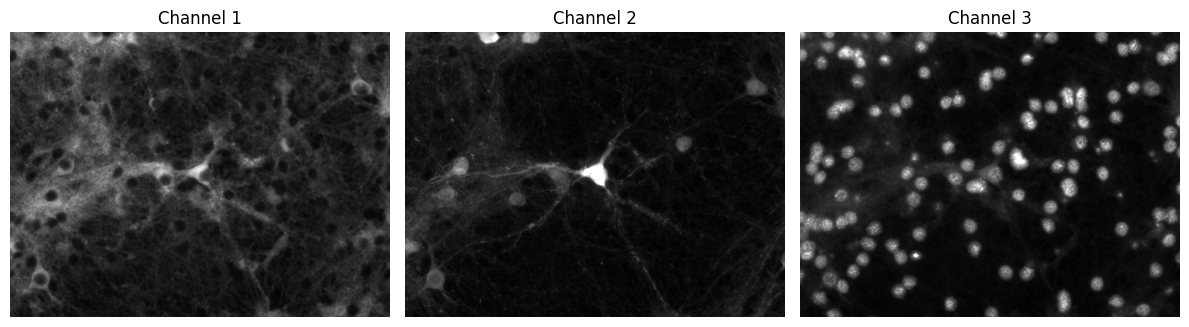

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    axes[i].imshow(img[:,:,i], cmap="gray")
    axes[i].set_title(f"Channel {i+1}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [27]:
#For nuclei segmentation, let's just choose GFP and DAPI channel
selected_channels = [1, 2]
img_selected_channels = np.zeros_like(img)
img_selected_channels[:,:,:len(selected_channels)] = img[:,:,selected_channels]

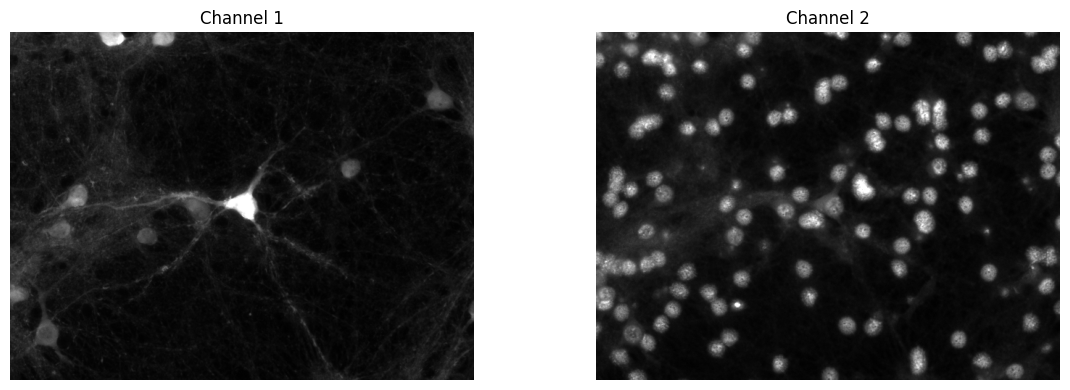

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i in range(2):
    axes[i].imshow(img_selected_channels[:,:,i], cmap="gray")
    axes[i].set_title(f"Channel {i+1}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

## Instantiate the CellPose Segment Anything Model

In [13]:
model = models.CellposeModel(gpu=True)

2025-10-29 14:50:33,489 [INFO] ** TORCH CUDA version installed and working. **
2025-10-29 14:50:33,490 [INFO] >>>> using GPU (CUDA)
2025-10-29 14:50:34,431 [INFO] >>>> loading model C:\Users\labadmin\.cellpose\models\cpsam


In [14]:
flow_threshold = 0.4
cellprob_threshold = 0.0
tile_norm_blocksize = 0

masks, flows, styles = model.eval(img_selected_channels, batch_size=32, flow_threshold=flow_threshold, cellprob_threshold=cellprob_threshold,
                                  normalize={"tile_norm_blocksize": tile_norm_blocksize})

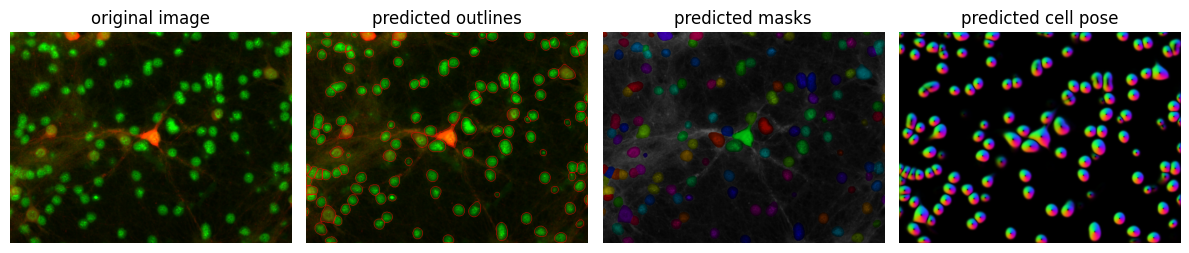

In [15]:
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, img_selected_channels, masks, flows[0])
plt.tight_layout()
plt.show()